In [47]:
#imported libraries
import math
import numpy as np
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function

This is a function to simulate stock prices and print the test result.

In [76]:
def simulate_stock(start,rate,vol,days):
    daily_yields=np.random.normal(loc=(rate/252),scale=(vol/(252**0.5)),size=days)
    cumulative_yields=np.cumsum(daily_yields)
    daily_multipliers=np.exp(cumulative_yields)
    simulated_prices = np.round(start * daily_multipliers, 2)
    simulated_prices = np.concatenate(([start],simulated_prices))
    return simulated_prices

The function above will be used to test the information below and it will simulate 60 daily prices for a stock with a current price of 500, an expected annual return of 8%, and an annual volatility of 0.3. It will store the simulated prices in the simulated_prices variable and then plot them using a line plot.

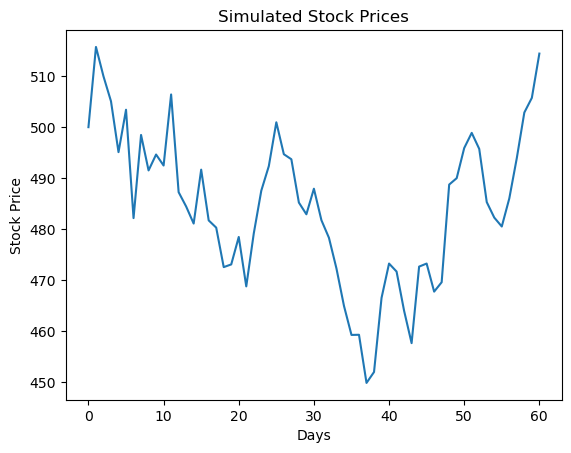

Final price: 514.44


In [79]:
# Test the function
# Simulate 60 daily prices for a stock
np.random.seed(1)
days = 60
start = 500
vol = 0.3
rate = 0.08
simulated_prices = simulate_stock(start,rate,vol,days)
#print(simulated_prices[-1])
#plt.plot(simulated_prices)

# # Plot the simulated prices
plt.plot(simulated_prices)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Prices')
plt.show()

# Print the final price 
print(f"Final price: {simulated_prices[-1]}")

## Part B: Annual Yield Function
The function will calculate the annual Simulate stock prices, loop will be used to calculate and test the code

This code calculates the annual yield for a given run using the find_yield function. The formula for the annual yield function is applied using the final price, initial price, and the number of days in the run.

In [93]:
# function
def find_yield(run):
    days = len(run) - 1
    initial_price = run[0]
    final_price = run[-1]
    annual_yield = math.log(final_price/initial_price) * 252/days
    return round(annual_yield, 4)
annual_yield = find_yield(simulated_prices)
print("Annual Yield:", annual_yield)

Annual Yield: 0.1196


This below code will simulates and plots 25 runs with different starting parameters. The annual yields for each run are stored in a list and displayed at the end.

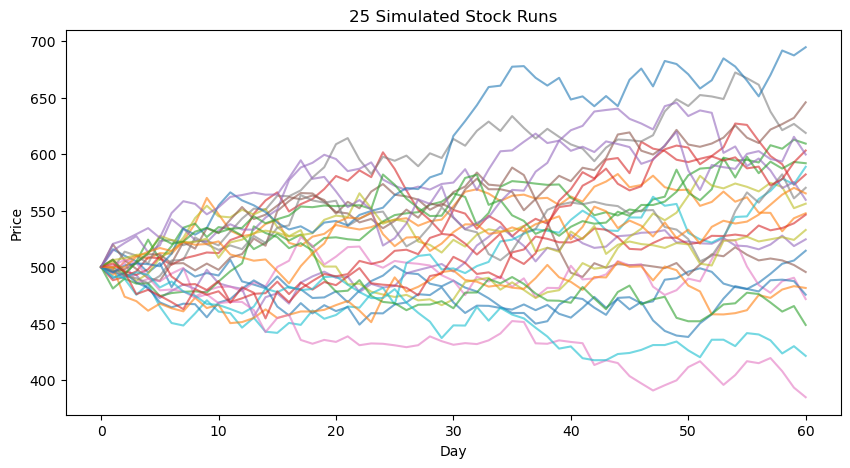

Annual yields for the 25 runs: [0.1196, 0.3819, 0.8308, 0.6383, 0.201, -0.0375, -0.2457, 0.8955, 0.4468, 0.6868, -0.2111, -0.1591, -0.4554, 0.3722, 0.4726, 1.0759, -1.1023, 0.5519, 0.2671, -0.7202, 1.3819, 0.5151, 0.7093, 0.7884, 0.7639]


In [104]:
np.random.seed(1)
plt.figure(figsize=(10,5))
annual_yields = []
for i in range(25):
    simulated_prices = simulate_stock(start,rate,vol,days)
    annual_yield = find_yield(simulated_prices)
    annual_yields.append(annual_yield)
    plt.plot(simulated_prices, alpha=0.6)
plt.title('25 Simulated Stock Runs')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

print("Annual yields for the 25 runs:", annual_yields)



## Part C: Finding Seeds that Generate Specific Outcomes

In the cell below, Stock A has the highest simulated final price.

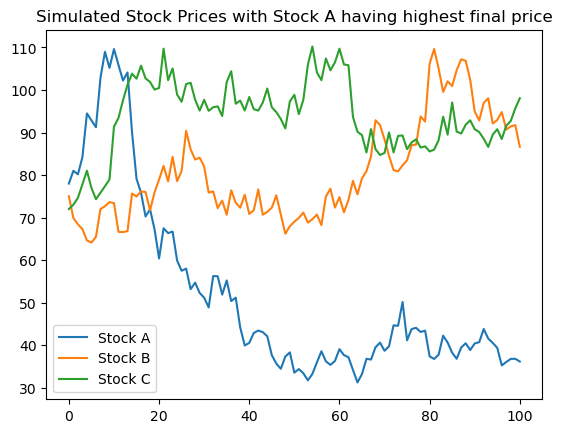

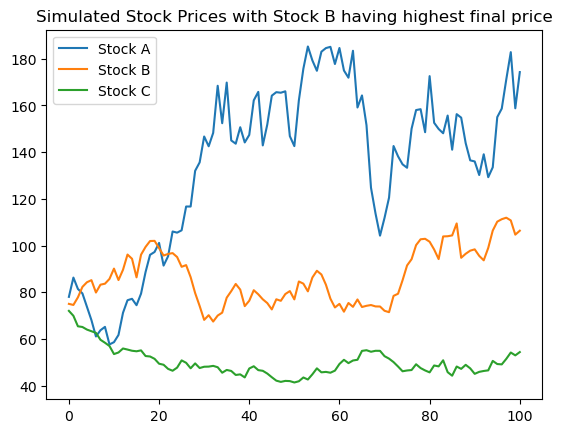

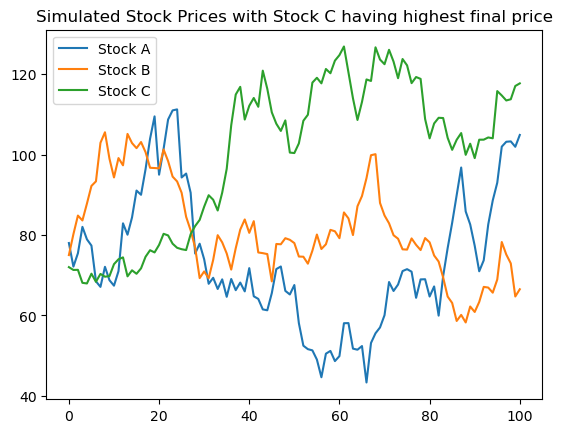

In [107]:
# Part C: Finding Seeds that Generate Specific Outcomes

# Stock A highest final price
np.random.seed(42)  # Replace 42 with the seed you found
run_a = simulate_stock(78, 0.04, 1.2, 100)
run_b = simulate_stock(75, 0.08, 0.8, 100)
run_c = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(run_a, label='Stock A')
plt.plot(run_b, label='Stock B')
plt.plot(run_c, label='Stock C')
plt.legend()
plt.title('Simulated Stock Prices with Stock A having highest final price')
plt.show()

# Stock B highest final price
np.random.seed(24)  # Replace 24 with the seed you found
run_a = simulate_stock(78, 0.04, 1.2, 100)
run_b = simulate_stock(75, 0.08, 0.8, 100)
run_c = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(run_a, label='Stock A')
plt.plot(run_b, label='Stock B')
plt.plot(run_c, label='Stock C')
plt.legend()
plt.title('Simulated Stock Prices with Stock B having highest final price')
plt.show()

# Stock C highest final price
np.random.seed(56)  # Replace 56 with the seed you found
run_a = simulate_stock(78, 0.04, 1.2, 100)
run_b = simulate_stock(75, 0.08, 0.8, 100)
run_c = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(run_a, label='Stock A')
plt.plot(run_b, label='Stock B')
plt.plot(run_c, label='Stock C')
plt.legend()
plt.title('Simulated Stock Prices with Stock C having highest final price')
plt.show()


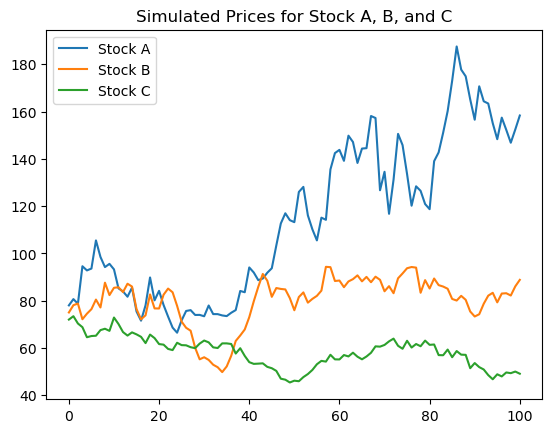

In [133]:
# Part C: Finding Seeds that Generate Specific Outcomes

# Simulate 3 stocks with different parameters
def simulate_multiple_stocks():
    np.random.seed(5)  # Example seed; change to get desired result
    
    # Parameters for Stock A, B, and C
    stock_a = simulate_stock(78, 0.04, 1.2, 100)
    stock_b = simulate_stock(75, 0.08, 0.8, 100)
    stock_c = simulate_stock(72, 0.16, 0.6, 100)
    
    # Plot the stocks
    plt.plot(stock_a, label="Stock A")
    plt.plot(stock_b, label="Stock B")
    plt.plot(stock_c, label="Stock C")
    plt.title("Simulated Prices for Stock A, B, and C")
    plt.legend()
    plt.show()

# Test Part C
simulate_multiple_stocks()


## Part D: Monte Carlo Simulation
The purpose of the code in this part is to perform a Monte Carlo simulation for a stock using the given parameters. 

The simulation generates multiple runs of the stock and calculates the final simulated price and annual yield for each run. The function monte_carlo accepts five parameters: start (current price of the stock), rate (expected annual return), vol (volatility), days (number of days for each run), and num_runs (number of simulated runs).

In [111]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    
    for i in range(num_runs):
        run = simulate_stock(start, rate, vol, days)
        final_prices.append(run[-1])
        annual_yields.append(find_yield(run))
    return np.array(final_prices), np.array(annual_yields)

Test the function code, by setting the seed to 1 to run to get the start price, annual return, voilital and similation 

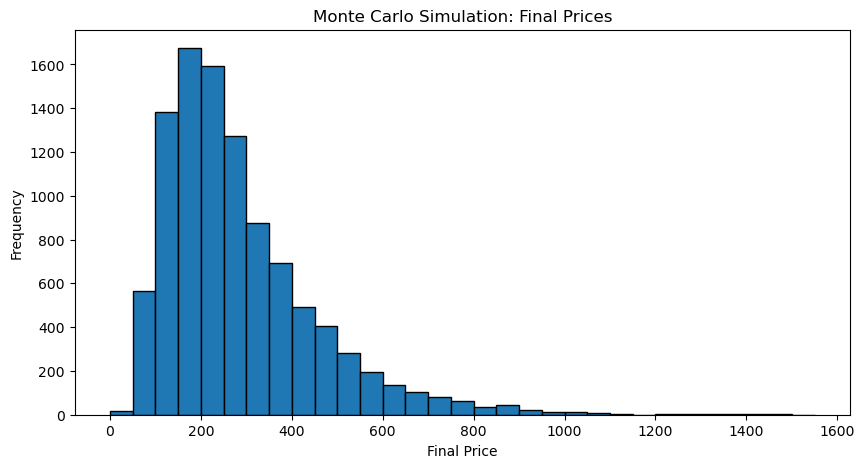

In [120]:
# Set the seed
np.random.seed(1)

# Run a Monte Carlo simulation
start_price = 200
annual_return = 0.10
volatility = 0.4
simulation_days = 500
num_simulations = 10000

final_prices, _ = monte_carlo(start_price, annual_return, volatility, simulation_days, num_simulations)


# Create a histogram of final prices
plt.figure(figsize=(10, 5))
plt.hist(final_prices, bins=np.arange(0, 1600, 50), edgecolor='black')
plt.title('Monte Carlo Simulation: Final Prices')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

### Display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices. 

In [116]:
# Calculate percentiles
percentiles = [10, 25, 50, 75, 90]
for p in percentiles:
    print(f"{p}th percentile: {np.percentile(final_prices, p):.2f}")

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility

The purpose of the code in this part is to explore the effect of volatility on simulated stock prices. We will perform two Monte Carlo simulations, each with different volatilities but the same parameters otherwise. The simulations will be conducted for two stocks: Stock A and Stock B.

In [35]:
np.random.seed(1)
# Run Monte Carlo simulations for Stock A and Stock B
start_price = 100
expected_return_A = 0.12
volatility_A = 0.3
volatility_B = 0.7
num_runs = 10000

final_prices_A, annual_yields_A = monte_carlo(start_price, expected_return_A, volatility_A, 150, num_runs)
final_prices_B, annual_yields_B = monte_carlo(start_price, expected_return_A, volatility_B, 150, num_runs)


# Calculate average annual yields
avg_yield_a = np.mean(annual_yields_A)
avg_yield_b = np.mean(annual_yields_B)

print(f"Average Annual Yield for A over 10000 runs: {avg_yield_a:.4f}")
print(f"Average Annual Yield for B over 10000 runs: {avg_yield_b:.4f}")



Average Annual Yield for A over 10000 runs: 0.1043
Average Annual Yield for B over 10000 runs: 0.2373


### The histograms will show a tightly clustered distribution with a peak near 120 for Stock A, and a wider range of likely outcomes with a peak near 80 and a long tail for Stock B.

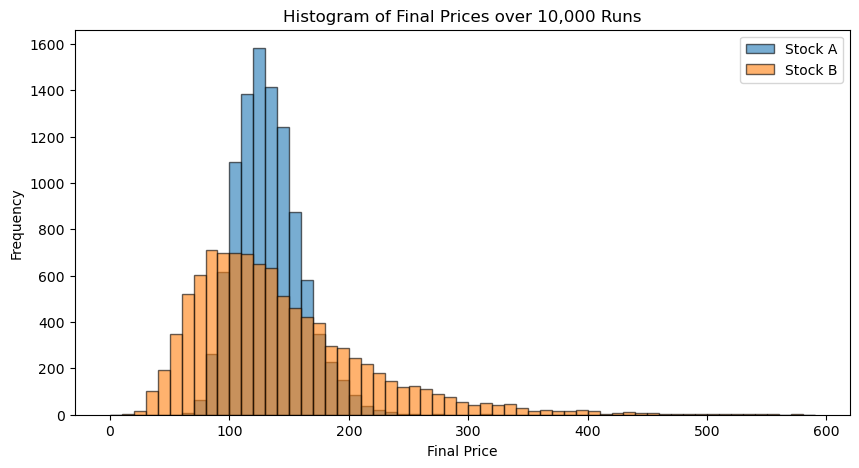

In [118]:
plt.figure(figsize=[10, 5])
plt.hist(final_prices_A, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock A')
plt.hist(final_prices_B, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock B')
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


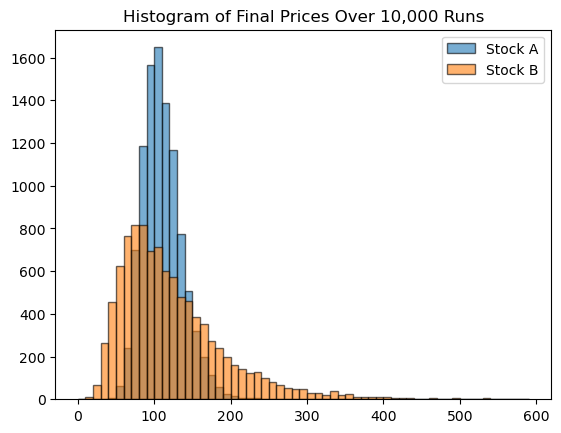

In [131]:
# Part E: Effects of Volatility

# Function to compare effects of volatility
def compare_volatility():
    np.random.seed(1)
    
    # Monte Carlo simulation for two stocks with different volatilities
    final_a, yields_a = monte_carlo(100, 0.12, 0.3, 150, 10000)
    final_b, yields_b = monte_carlo(100, 0.12, 0.7, 150, 10000)
    
    # Calculate average yields
    avg_yield_a = round(np.mean(yields_a), 4)
    avg_yield_b = round(np.mean(yields_b), 4)
    
    print(f"Average Annual Yield for A over 10000 runs: {avg_yield_a}")
    print(f"Average Annual Yield for B over 10000 runs: {avg_yield_b}")
    
    # Plot histograms
    plt.hist(final_a, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock A')
    plt.hist(final_b, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock B')
    plt.title("Histogram of Final Prices Over 10,000 Runs")
    plt.legend()
    plt.show()

# Test Part E
compare_volatility()


## Part F: Comparing Two Stocks
The purpose of the code in this part is to compare two stocks, Stock A and Stock B, using Monte Carlo simulation to estimate probabilities related to their performance. We will run Monte Carlo simulations for both stocks with different parameters and calculate various proportions based on the simulated runs.

In [41]:
np.random.seed(1)
start_price = 120
expected_return_A = 0.08
volatility_A = 0.2
expected_return_B = 0.05
volatility_B = 0.5

final_prices_A, _ = monte_carlo(start_price, expected_return_A, volatility_A, 252, num_runs)
final_prices_B, _ = monte_carlo(start_price, expected_return_B, volatility_B, 252, num_runs)

# Calculate proportions
prop_a_b = np.mean(final_prices_A > final_prices_B)
prop_a_gt_150 = np.mean(final_prices_A > 150)
prop_b_gt_150 = np.mean(final_prices_B > 150)
prop_a_lt_100 = np.mean(final_prices_A < 100)
prop_b_lt_100 = np.mean(final_prices_B < 100)

# Display results
print(f"Proportions of runs in which...")
print('-'*25
     )
print(f"A ends above B:   {prop_a_b:.4f}")
print(f"A ends above 150: {prop_a_gt_150:.4f}")
print(f"B ends above 150: {prop_b_gt_150:.4f}")
print(f"A ends below 100: {prop_a_lt_100:.4f}")
print(f"B ends below 100: {prop_b_lt_100:.4f}")

Proportions of runs in which...
-------------------------
A ends above B:   0.5206
A ends above 150: 0.2338
B ends above 150: 0.3619
A ends below 100: 0.0950
B ends below 100: 0.3195


In [129]:
# Part F: Comparing Two Stocks

# Function to compare two stocks
def compare_two_stocks():
    np.random.seed(1)
    
    # Simulate 10,000 runs for two stocks
    final_a, _ = monte_carlo(120, 0.08, 0.2, 252, 10000)
    final_b, _ = monte_carlo(120, 0.05, 0.5, 252, 10000)
    
    # Calculate proportions
    a_above_b = np.mean(final_a > final_b)
    a_above_150 = np.mean(final_a > 150)
    b_above_150 = np.mean(final_b > 150)
    a_below_100 = np.mean(final_a < 100)
    b_below_100 = np.mean(final_b < 100)
    
    # Print results
    print(f"A ends above B: {a_above_b:.4f}")
    print(f"A ends above 150: {a_above_150:.4f}")
    print(f"B ends above 150: {b_above_150:.4f}")
    print(f"A ends below 100: {a_below_100:.4f}")
    print(f"B ends below 100: {b_below_100:.4f}")

# Test Part F
compare_two_stocks()


A ends above B: 0.5206
A ends above 150: 0.2338
B ends above 150: 0.3619
A ends below 100: 0.0950
B ends below 100: 0.3195


## Part G: Expected Call Payoff

In this part, we will use Monte Carlo simulation to estimate the expected payoff of a call option on a particular stock. The call has a specified strike price and expires after a given time period. We will calculate the average call payoff based on the simulated runs of the stock.

In [141]:
np.random.seed(1)
start_price = 200
expected_return = 0.11
volatility = 0.4
num_runs = 10000
Days = 150
strike_price = 225

final_prices, _ = monte_carlo(start_price, expected_return,volatility,days,num_runs)
# #payoff = np.where(final_prices - strike_price, 0)
# call_payoff = np.where(final_prices > strike_price, final_prices - strike_price, 0)
# average_payoff = np.mean(call_payoff)
# print(f'Average Call Payoff over 10000 runs: {average_payoff:.2f}')


payoff = np.where(final_prices > strike_price, final_prices - strike_price, 0)
    
# Calculate average payoff
avg_payoff = np.mean(payoff)
print(f"Average call payoff over 10,000 runs: {avg_payoff:.2f}")

Average call payoff over 10,000 runs: 10.42


In [137]:
# Part G: Expected Call Payoff

# Function to calculate expected call payoff
def expected_call_payoff():
    np.random.seed(1)
    
    # Run Monte Carlo simulation
    final_prices, _ = monte_carlo(200, 0.11, 0.4, 150, 10000)
    
    # Calculate payoff
    strike_price = 225
    payoff = np.maximum(final_prices - strike_price, 0)
    
    # Calculate average payoff
    avg_payoff = np.mean(payoff)
    print(f"Average call payoff over 10,000 runs: {avg_payoff:.2f}")

# Test Part G
expected_call_payoff()


Average call payoff over 10,000 runs: 27.10
